## 1. Introduction

With growing demands in the market, a Superstore Giant likes to have a better understanding of what factors matter to the sales and improve the forthcoming sales strategy. 

The project is using data ['Superstore.csv'](Https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) from Kaggle containing information related to sales, profits, and other facts about a giant Superstore between Jan. 2014 and Jan. 2018 across 48 states in the US. Some state have full 4-year records but others have records of 1 or 2 years only.
***

### Objective

In this project, we challenge ourselves: can we predict the profit in one of the states using the Superstore’s sales data?  

The aim is to analyze historical data and build a predictive model. More importantly, we want to explore which information is more useful to drive the growth of the profit. 

 - To explore, organize and analyze the data,  and make sure it's well defined
 - To identify features that significantly affect the sales
 - To develop different machine learning models that predict the sales
 - To assess the model performance and select the best model
 ***
 
### Data
a. Orders
 - Row ID => Unique ID for each row.
 - Order ID => Unique Order ID for each Customer.
 - Order Date => Order Date of the product.
 - Ship Date => Shipping Date of the Product.
 - Ship Mode=> Shipping Mode specified by the Customer.
 - Customer ID => Unique ID to identify each Customer.
 - Customer Name => Name of the Customer.
 - Segment => The segment where the Customer belongs.
 - Country => Country of residence of the Customer.
 - City => City of residence of of the Customer.
 - State => State of residence of the Customer.
 - Postal Code => Postal Code of every Customer.
 - Region => Region where the Customer belong.

b. Products
 - Product ID => Unique ID of the Product.
 - Category => Category of the product ordered.
 - Sub-Category => Sub-Category of the product ordered.
 - Product Name => Name of the Product
 - Sales => Sales of the Product.
 - Quantity => Quantity of the Product.
 - Discount => Discount provided.
 - Profit => Profit/Loss incurred.

## 2. Sourcing and Loading the Data

### 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import datetime as dt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update(plt.rcParamsDefault)
sns.set()

### 2.2 Load the data

In [2]:
# read data
df = pd.read_csv('Data/Superstore.csv', encoding='ISO-8859-1')
# check the first few rows of data
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [3]:
print("The dataset contains: {} customers and {} features.".format(df.shape[0], df.shape[1]))
df.info()

The dataset contains: 9994 customers and 21 features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17

## 3. Data Cleaning 

### 3.1 Check null/missing values

In [4]:
df.isnull().sum()
# - Data is very clean and no missing value is observed.

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Ship mode
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [6]:
# Segment
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [7]:
# df['City'].value_counts()
df['City'].nunique()

531

In [8]:
# Region
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [9]:
# Category
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

 ### 3.2 check outliers

In [10]:
from sklearn.ensemble import IsolationForest

def detect_outliers(dataframe,contamination):
    
    cols = list(df.select_dtypes(['int64']).columns)+list(df.select_dtypes(['float64']).columns)
    model=IsolationForest(contamination=contamination)
    model.fit(df[cols])
    outliers = model.predict(dataframe[cols]) ==-1
    return outliers

In [11]:
# finding outliers considering 0.5% of contamination
contamination=0.005
index=detect_outliers(df,contamination)
row,col=df[index].shape
print("number of outliers: {}".format(row))

number of outliers: 50


In [12]:
# remove 50 outliers
df=df[index==False]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9944 non-null   int64  
 1   Order ID       9944 non-null   object 
 2   Order Date     9944 non-null   object 
 3   Ship Date      9944 non-null   object 
 4   Ship Mode      9944 non-null   object 
 5   Customer ID    9944 non-null   object 
 6   Customer Name  9944 non-null   object 
 7   Segment        9944 non-null   object 
 8   Country        9944 non-null   object 
 9   City           9944 non-null   object 
 10  State          9944 non-null   object 
 11  Postal Code    9944 non-null   int64  
 12  Region         9944 non-null   object 
 13  Product ID     9944 non-null   object 
 14  Category       9944 non-null   object 
 15  Sub-Category   9944 non-null   object 
 16  Product Name   9944 non-null   object 
 17  Sales          9944 non-null   float64
 18  Quantity

### 3.3 Remove undesired rows/columns

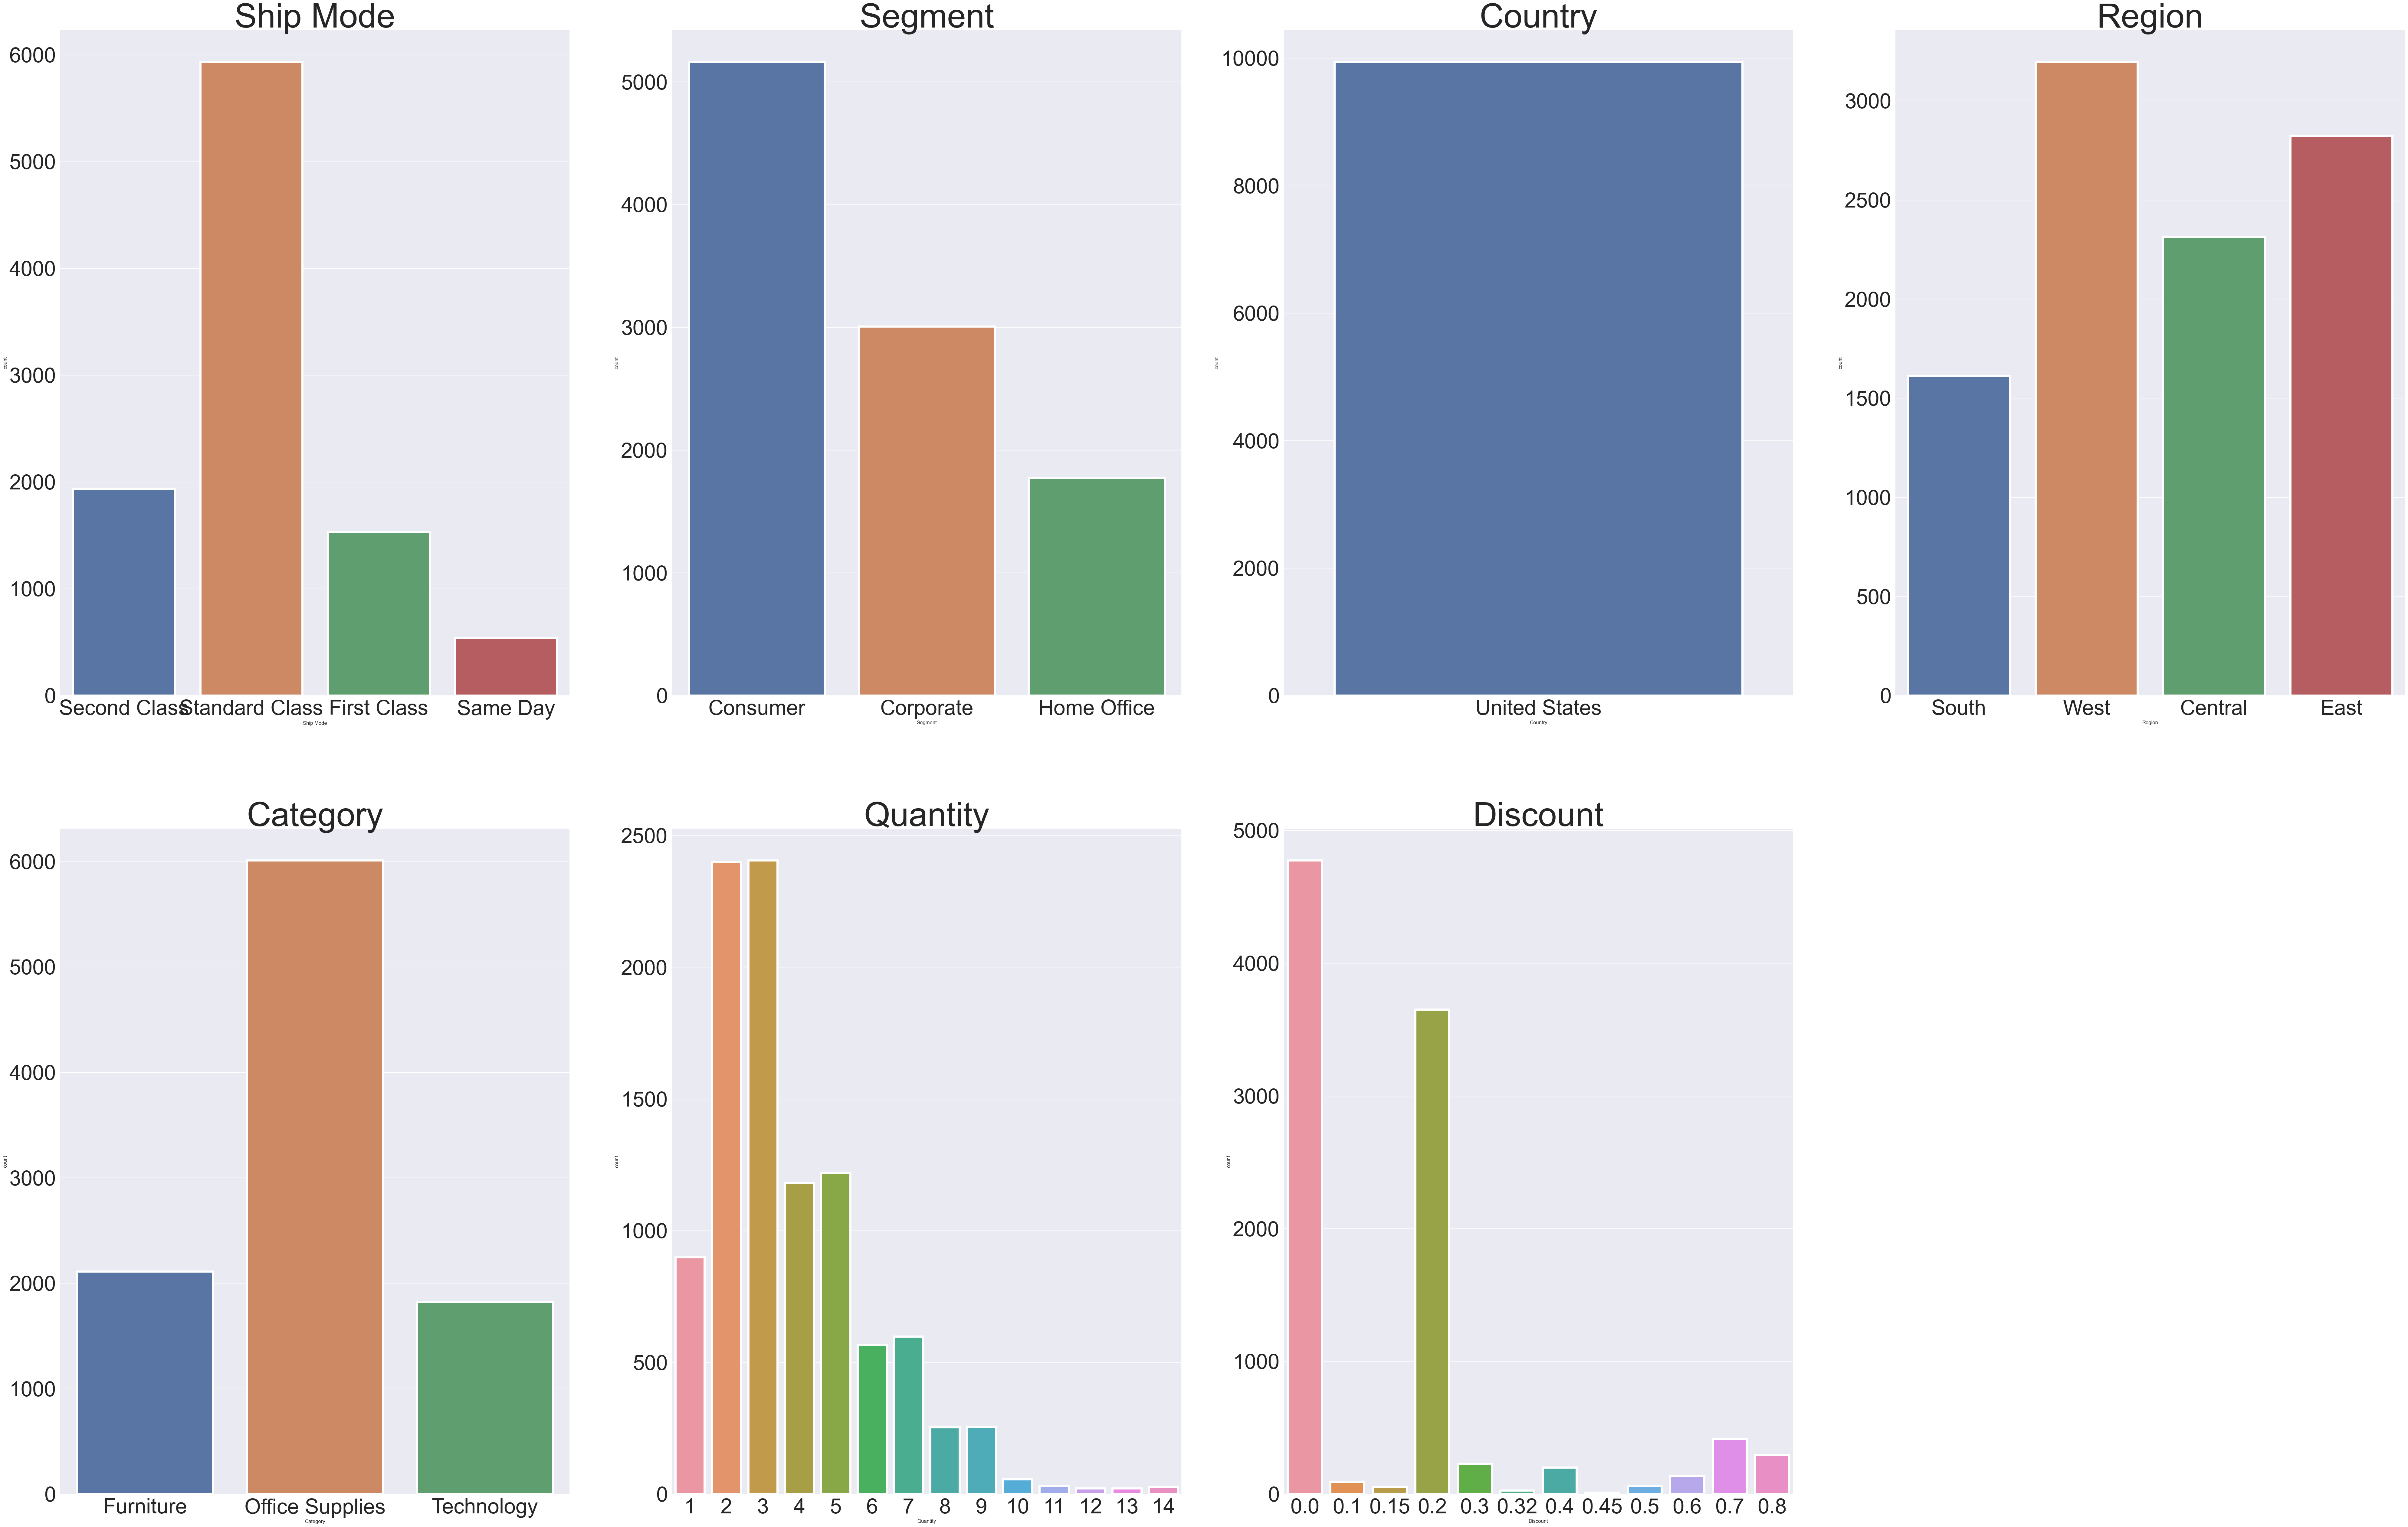

In [14]:
from math import ceil

def countplots(df,max_columns,val,figsize,title_size=20, title=""):
    leh=len(df.columns)
    rows=ceil(leh/max_columns)
    fig=plt.figure(1,figsize=figsize)
    i=1
     
    for col in df.columns:
        if len(pd.unique(df[col]))<val:
            plt.subplot(rows,max_columns,i)
            plt.title(col, fontsize=title_size)
            i=i+1
            p=sns.countplot(data = df, x=col,linewidth=5)
            #to increase y ticks size
            plt.yticks(size=50)
            #to increase x ticks 
            plt.xticks(size=50)
            
    plt.show();
    
countplots(df,4,15,(100,200),80)    

In [15]:
# the dataset is only located in the US
# confirm with pandas .nunique
df['Country'].nunique()

1

In [16]:
# state - 49
df['State'].nunique()

49

In [17]:
# city -531
df['City'].nunique()

531

In [18]:
# unique customers - 793
df['Customer ID'].nunique()

793

In [19]:
To_Drop = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Country', 'Postal Code']
df.drop(columns=To_Drop, axis=1, inplace=True)

 - 'Row ID', 'Order ID', 'Customer ID','Customer Name', and 'Product ID' were dropped because they don't provide much predictive power in this case.
 - 'Country' was dropped, as all the instances occur in the United States.
 - 'Postal Code' was dropped.

### 3.4 Convert 'Order Date' and 'Ship Date' to 'datetime' objects instead of objects

In [20]:
df = df.rename(columns={'Ship Mode': 'ShipMode'})

In [21]:
# reformat and convert 'object' to 'datetime' 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [22]:
# generate a new column about the time between order and shipping to gain more information on the date
# df['Sale_Year'] = df['Order Date'].dt.year
#df['Waiting_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [23]:
# sort
df = df.sort_values(by=['Sales', 'Profit'], ascending=[False, False])

In [24]:
#df.head(3)

## 4. EDA

### 4.1  Univariate analysis
Explore each variable, study characteristics of each variable, and there is no reference to causes or relationships.

Univariate non-graphical: Central tendency, Deviation, Skewness, kurtosis, etc.

Univariate graphical: Histogram, Box Plots, Pie Charts, Density Plot, etc.

#### ANOVA test

ANOVA is used to estimate how the mean of a quantitative variable changes according to the levels of categorical variables. Use a ANOVA when you want to know how independent variables, in combination, affect a dependent variable.

F-statistic: Variation between sample means / Variation within samples; the larger the F-statistic, the greater the evidence that there is a difference between the group means.

In [25]:
#check the effect of categorical variable on our target variable 'profit'
from scipy.stats import ttest_1samp
import statsmodels.api as sm
from statsmodels.formula.api import ols

cols=['ShipMode', 'Segment','Region','Category','Quantity','Discount']

for item in cols:
    model=ols('Profit ~ {}'.format(item),data=df).fit()
    anova_result=sm.stats.anova_lm(model,typ=2)
    print(anova_result)
    print()

                sum_sq      df         F    PR(>F)
ShipMode  9.870528e+04     3.0  2.231203  0.082402
Residual  1.465772e+08  9940.0       NaN       NaN

                sum_sq      df       F   PR(>F)
Segment   5.927495e+04     2.0  2.0095  0.13411
Residual  1.466166e+08  9941.0     NaN      NaN

                sum_sq      df          F        PR(>F)
Region    5.159349e+05     3.0  11.695845  1.202053e-07
Residual  1.461600e+08  9940.0        NaN           NaN

                sum_sq      df           F        PR(>F)
Category  3.454800e+06     2.0  119.899109  3.520434e-52
Residual  1.432211e+08  9941.0         NaN           NaN

                sum_sq      df           F        PR(>F)
Quantity  1.689194e+06     1.0  115.831094  7.275309e-27
Residual  1.449867e+08  9942.0         NaN           NaN

                sum_sq      df            F         PR(>F)
Discount  1.479922e+07     1.0  1115.692627  6.118174e-232
Residual  1.318767e+08  9942.0          NaN            NaN



- Mean deviation of 'Profit'

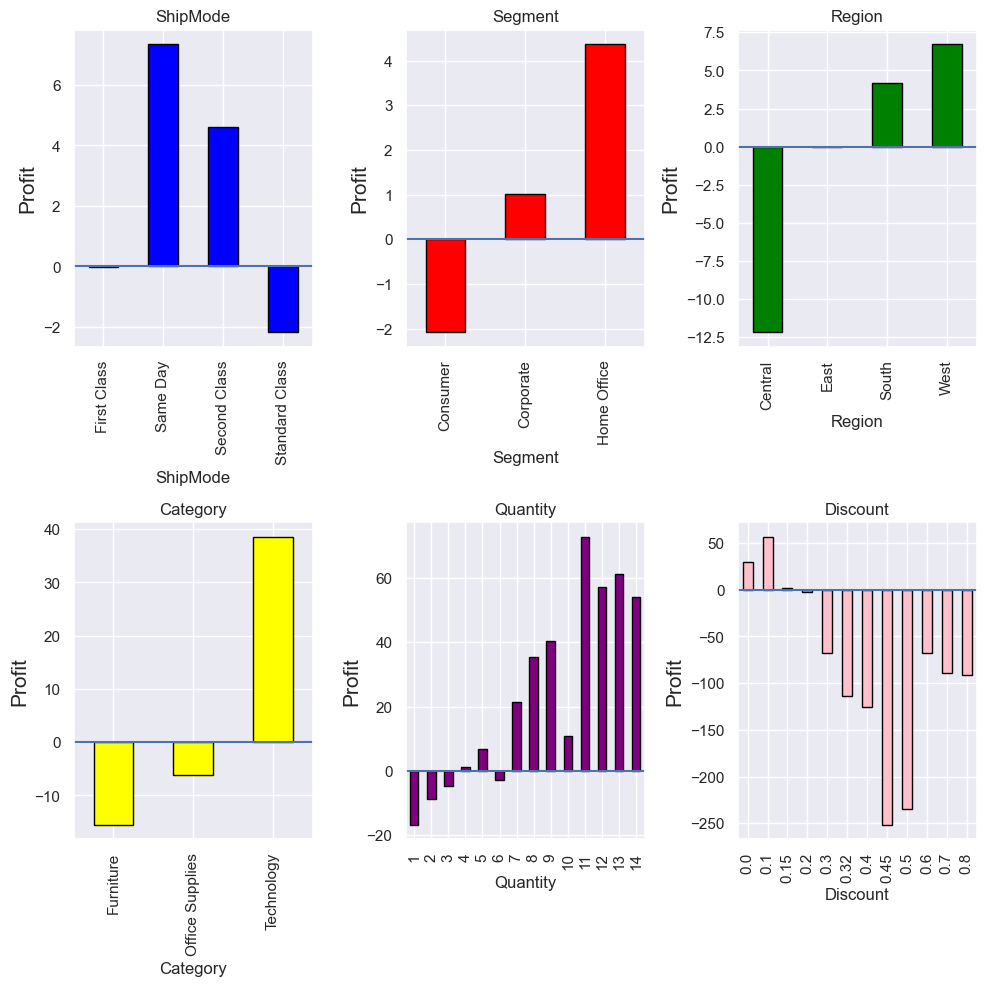

In [26]:
def mean_dev(dataframe,target,maxcol,cols,palette,size):
    mot=df[target].mean()
    fig=plt.figure(figsize=size)
    leh=len(cols)
    rows=ceil(leh/maxcol)
    i=1
    for item in cols:
        plt.subplot(rows,maxcol,i)
        plt.title(item)
        (df.groupby(str(item))[str(target)].mean()-mot).plot(kind='bar',color=palette[i-1],edgecolor='Black')
        plt.ylabel(str(target),size=15)
        plt.axhline(y=0)
        i =i+1
    fig.tight_layout(pad=1.0)
    plt.savefig('images/anova.png')
    plt.show();

mean_dev(df,'Profit',3,['ShipMode','Segment','Region','Category','Quantity','Discount'],['Blue','Red','Green','Yellow','Purple','Pink'],(10,10))

Based on 'profit' mean deviations, an ANOVA testing F-values show:

 - Discount : according to mean profit deviations the higher profit is generated with 10% discount then is decreasing for the 15-50% range; the worst profit is in the range of 45-55% discount.
 
 - Quantity : the mean of profit evolves increasingly with the quantity of products the customers ordered, the smallest number of product is one which corresponds to the lowest profit.
 
 - Category: according to profit deviations, 'Technology' products generated more profit.
  
 - 'Region': according to the deviations from different regions, 'West' Region tends to generate more profit.
  
 - 'Segment', 'Ship Mode': according to the deviations F-values, there is no significant difference from 'profit'.  

#### Distribution of average numeric variables per state

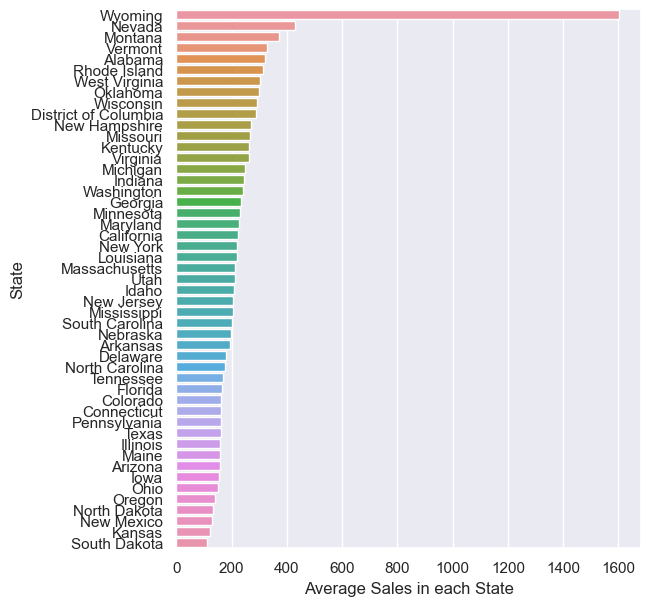

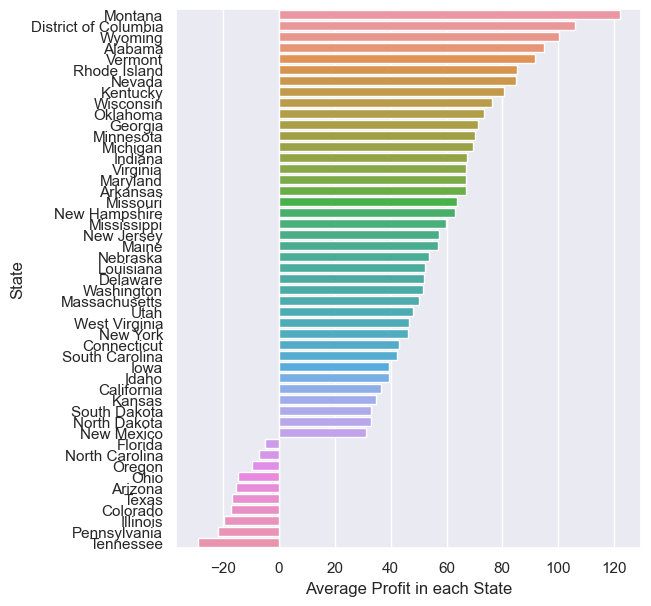

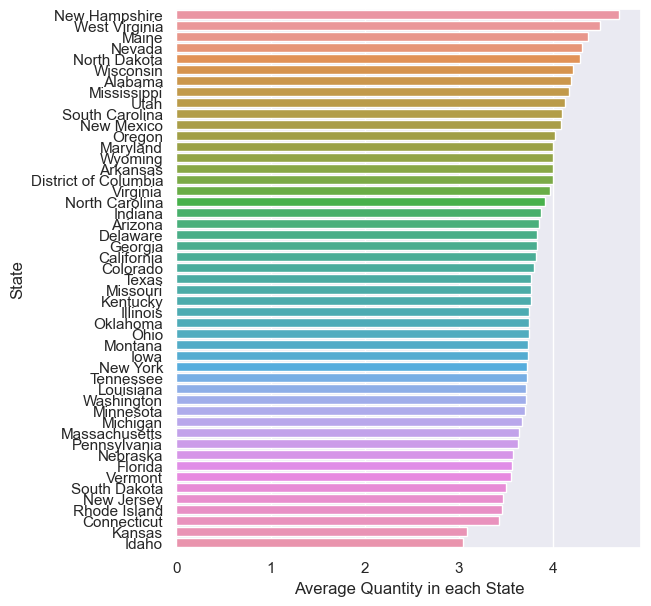

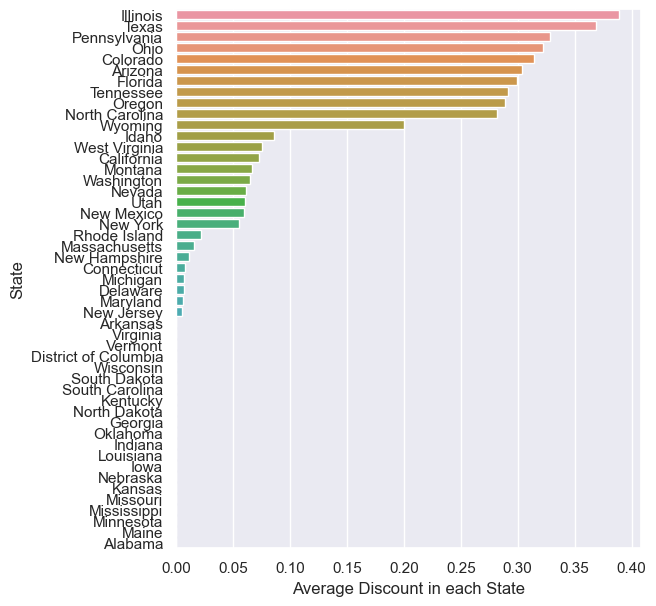

In [27]:
# create a list of columns to be analyszed numerically for all cities
numerical_cols = ['Sales','Profit', 'Quantity', 'Discount']

for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(6,7))
    mean_df = df.groupby(by=['State'])[col].mean()
    mean_df.sort_values(inplace=True,ascending=False)
    sns.barplot(y=mean_df.index, x=mean_df, ax=ax)
    ax.set_xlabel(f'Average {col} in each State') 
    ax.set_ylabel('State')
    plt.savefig('images/avg_num.png')
    plt.show();

#### remove outliers of Sales

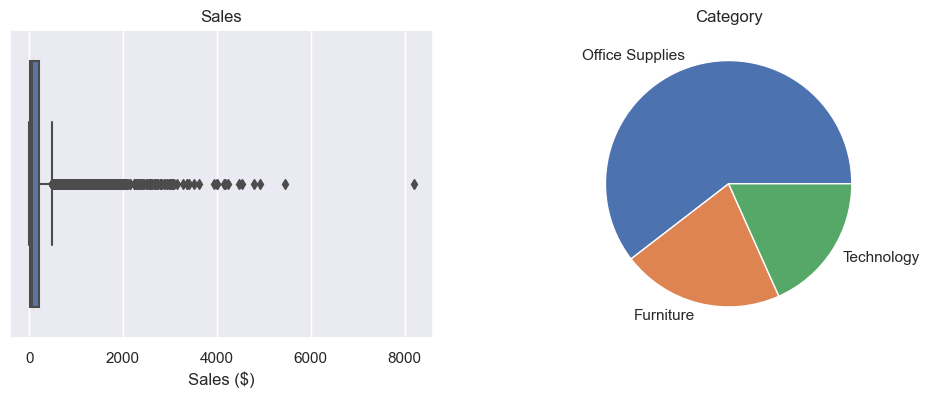

In [28]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')
plt.subplot(1,2,2)
df['Category'].value_counts(normalize=True).plot(kind="pie")
plt.title('Category')
plt.ylabel("")
plt.show();
# observation: office supplies account for the largest portion of total orders

In [29]:
# remove outliers
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
IQR = q3 - q1

filter = (df['Sales'] >= q1 -1.5 *IQR) & (df['Sales'] <= q3 + 1.5 *IQR)
df_cut = df.loc[filter]
df_cut.shape

(8809, 14)

In [30]:
# remove outliers
q1 = df_cut['Profit'].quantile(0.25)
q3 = df_cut['Profit'].quantile(0.75)
IQR = q3 - q1

filter = (df_cut['Profit'] >= q1 -1.5 *IQR) & (df_cut['Profit'] <= q3 + 1.5 *IQR)
df_cut = df_cut.loc[filter]

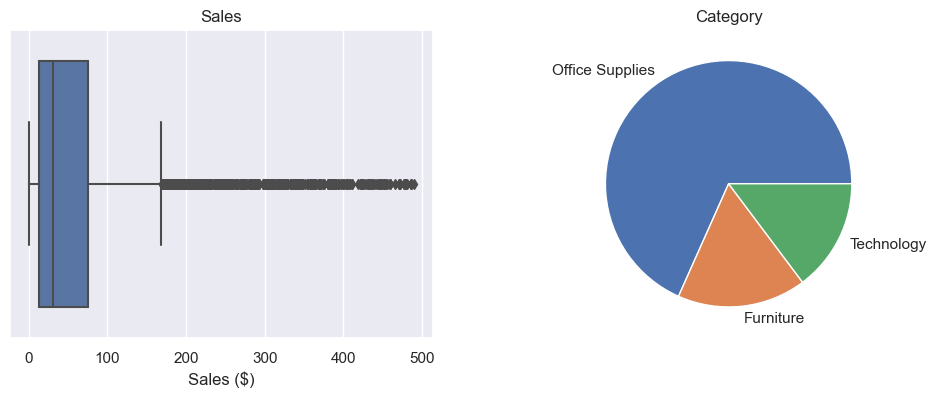

In [31]:
# plot the cleaned data
fig, axs = plt.subplots(1,3, figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=df_cut['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')

plt.subplot(1,2,2)
df_cut['Category'].value_counts(normalize=True).plot(kind="pie")
plt.title('Category')
plt.ylabel("")
plt.savefig('images/pie.png')
plt.show();

#### Top 10 states in total sales

In [32]:
# 
state_total_sales = {}
for y in df.groupby('State'):
    state = y[0]
    total = sum(y[1].Sales)
    state_total_sales[state] = total

df_state_total_sales = pd.DataFrame.from_dict(state_total_sales, orient='index', columns=['total_sales'])

df_state_total_sales = df_state_total_sales.sort_values(by='total_sales', ascending=False)
#df_state_total_sales.columns = ['State', 'total_sales']
df_state_total_sales.columns = ['total_sales']
df_state_total_sales[:10]

total_sales
California    447554.1815
New York      244981.5260
Texas         157236.5298
Washington    121247.6300
Pennsylvania   93883.2780
Illinois       78276.1110
Ohio           70770.1570
Michigan       62563.9040
Florida        62467.3320
Virginia       58386.8400

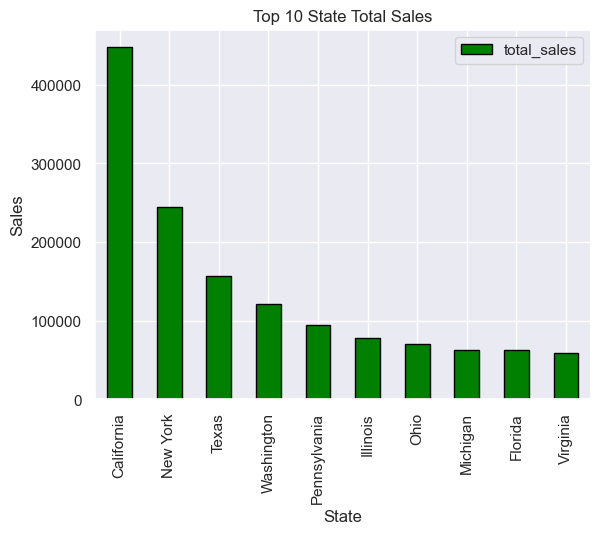

In [33]:
# top 10 states in sales
df_state_total_sales[:10].plot(kind='bar', color='green', edgecolor='Black')
plt.title('Top 10 State Total Sales')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show();

#### Top 10 states in profits 

In [34]:
state_total_profits = {}
for y in df.groupby('State'):
    state = y[0]
    total = sum(y[1].Profit)
    state_total_profits[state] = total

df_state_total_profits = pd.DataFrame.from_dict(state_total_profits, orient='index', columns=['total_profits'])

df_state_total_profits = df_state_total_profits.sort_values(by='total_profits', ascending=False)
df_state_total_profits.columns = [ 'total_profits']
df_state_total_profits.head(10)

total_profits
California     73328.2658
New York       51408.0813
Washington     26071.8085
Michigan       17610.3326
Virginia       14887.9846
Georgia        13072.5683
Kentucky       11199.6966
Indiana         9982.9603
Wisconsin       8401.8004
New Jersey      7406.9320

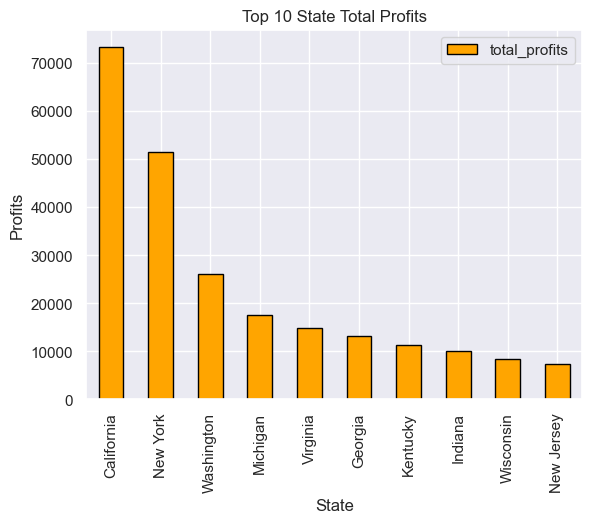

In [35]:
# # top 10 states in profits
df_state_total_profits[:10].plot(kind='bar', color='orange', edgecolor='Black')
plt.title('Top 10 State Total Profits')
plt.xlabel('State')
plt.ylabel('Profits')
plt.show();
# top 1 state: california the most densely populated state

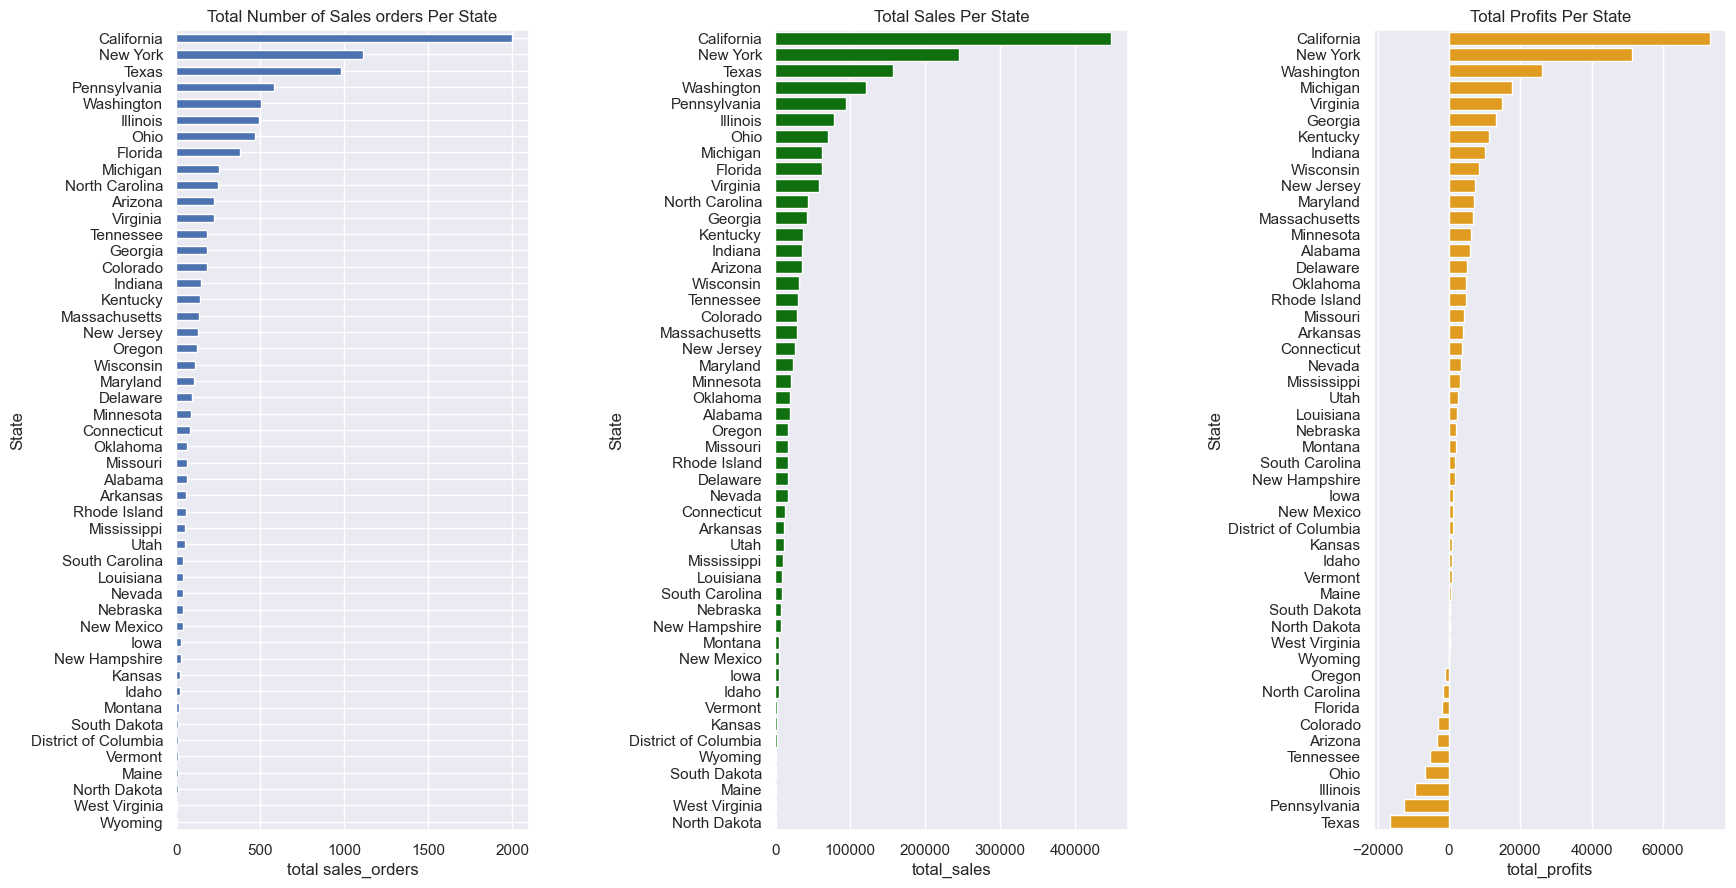

In [36]:
df_state_total_sales = df_state_total_sales.reset_index()
df_state_total_sales.columns = ['State','total_sales']
df_state_total_profits = df_state_total_profits.reset_index()
df_state_total_profits.columns = ['State','total_profits']


fig, ax = plt.subplots(1, 3, figsize=(20,16))

df.State.value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax[0])
ax[0].set_ylabel('State')
ax[0].set_xlabel('total sales_orders')
ax[0].set_title('Total Number of Sales orders Per State')

#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(bottom=0.3, top=0.8, wspace=0.7, hspace=0)
sns.barplot(y='State', x='total_sales', data=df_state_total_sales, color='green', ax=ax[1])
ax[1].set_ylabel('State')
ax[1].set_xlabel('total_sales')
ax[1].set_title('Total Sales Per State')

plt.subplots_adjust(bottom=0.3, top=0.8, wspace=0.7, hspace=0)
sns.barplot(y='State', x='total_profits', data=df_state_total_profits, color='orange', ax=ax[2])
ax[2].set_ylabel('State')
ax[2].set_xlabel('total_profits')
ax[2].set_title('Total Profits Per State')


#df.Region.value_counts().sort_values(ascending=True).plot(kind='barh', color='royalblue', ax=ax[3])
#ax[3].set_ylabel('Region')
#ax[3].set_xlabel('total sales_orders')
#ax[3].set_title('Total Number of Sales orders Per Region')


plt.savefig('images/total_profits.png')
plt.show();

#### Top 10 cities in total sales

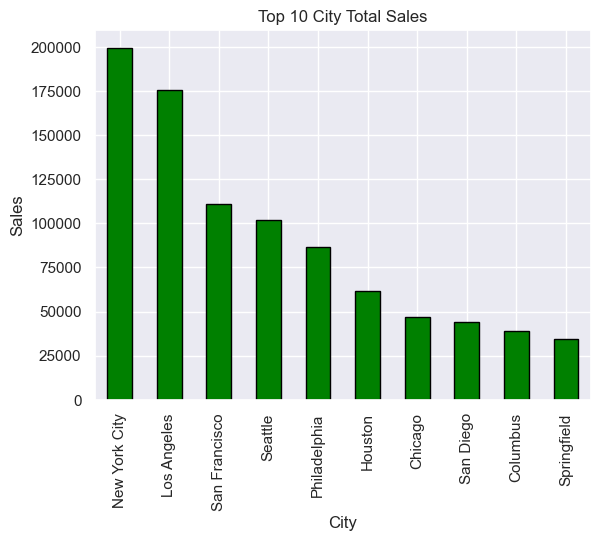

In [37]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='green',edgecolor='Black')
plt.title('Top 10 City Total Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show();

#### Top 10 cities in total Profit

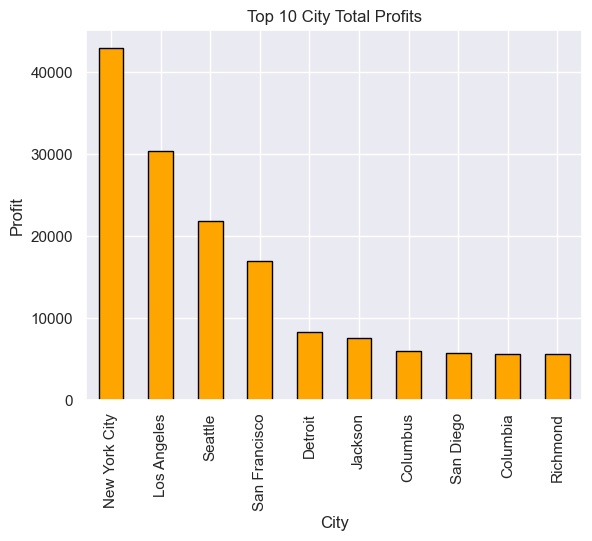

In [38]:
df.groupby('City')['Profit'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='orange',edgecolor='Black')
plt.title('Top 10 City Total Profits')
plt.xlabel('City')
plt.ylabel('Profit')
plt.show();

# top 1 city: New york - very densely populated city

#### Profits vs Region

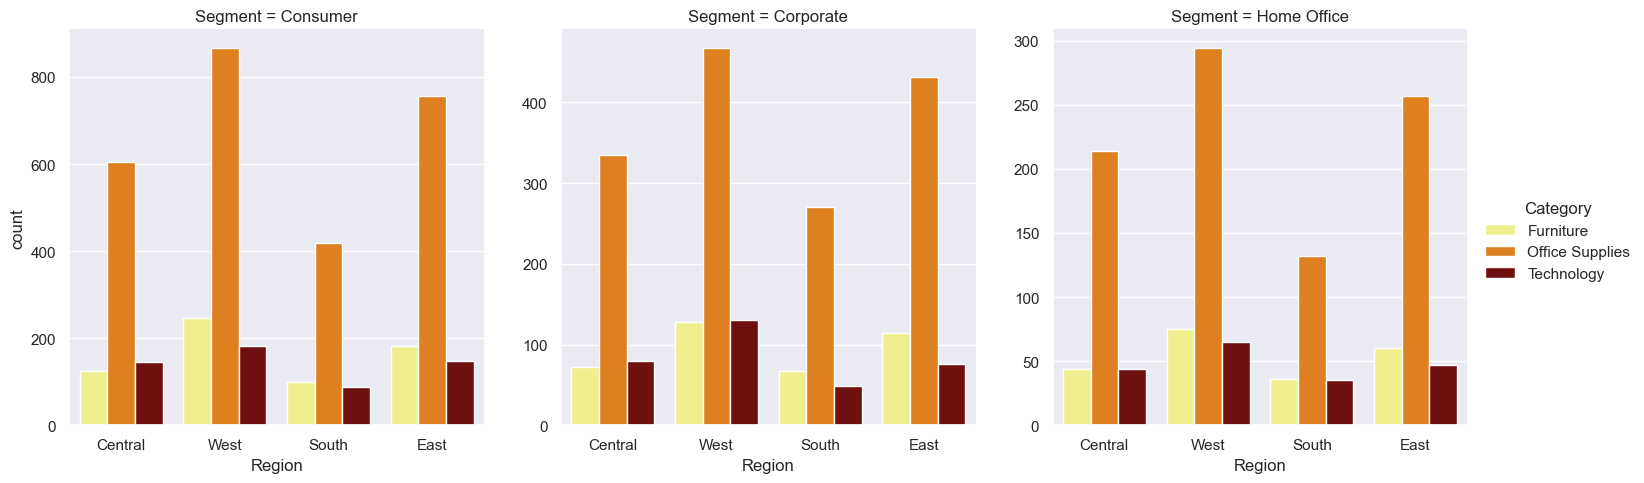

In [39]:
# total profit
sns.catplot(x='Region', hue='Category',  col='Segment', data=df_cut, kind="count", 
                estimator=lambda : len(x) / len(df_cut) * 100, sharey=False, palette="afmhot_r")
#plt.savefig('images/profit_total.png')
plt.show();

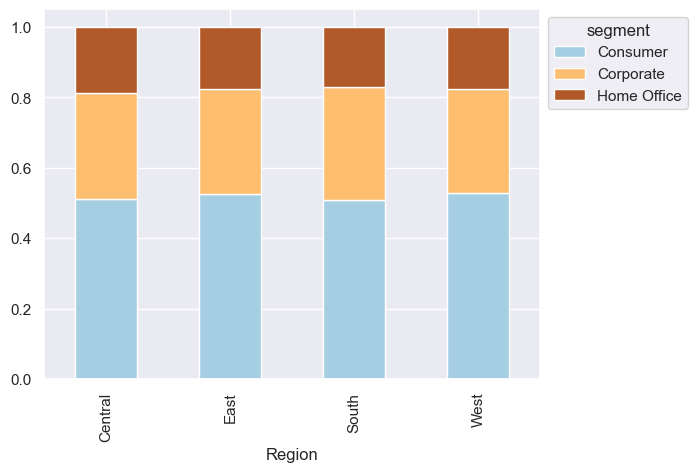

In [40]:
# positive profit
df_pos_profit = df_cut[df_cut['Profit']>0].sort_values('Profit')

by_pos_profit = df_pos_profit.groupby('Region').Segment.value_counts(normalize=True).unstack()
by_pos_profit.plot(kind="bar", stacked=True, cmap="Paired")
plt.legend(title = "segment", bbox_to_anchor= (1, 1))
plt.show();

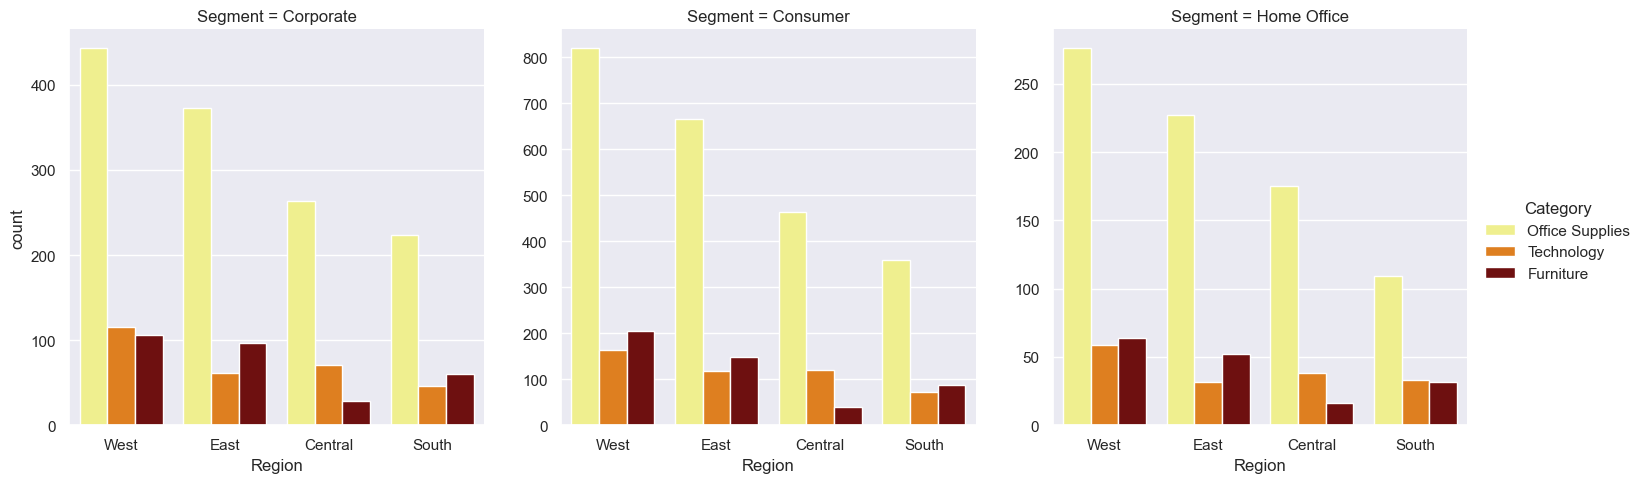

In [41]:
# plot
sns.catplot(x='Region', hue='Category',  col='Segment', data=df_pos_profit, kind="count", 
                estimator=lambda : len(x) / len(df_pos_profit) * 100, sharey=False, palette="afmhot_r")
#plt.savefig('images/profit_pos.png')
plt.show();
# obervation: 'office supplies' has the largest amount of orders across all the region.

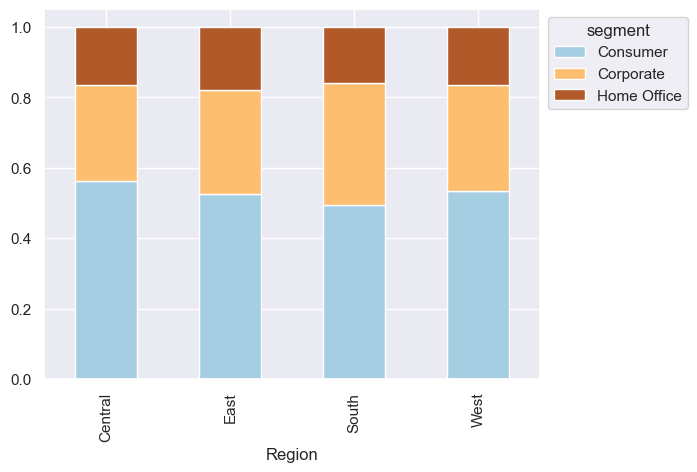

In [42]:
# negative profit
df_neg_profit = df_cut[df_cut['Profit']<0].sort_values('Profit')

by_neg_profit = df_neg_profit.groupby('Region').Segment.value_counts(normalize=True).unstack()
by_neg_profit.plot(kind="bar", stacked=True, cmap="Paired")
plt.legend(title = "segment", bbox_to_anchor= (1, 1))
plt.show();

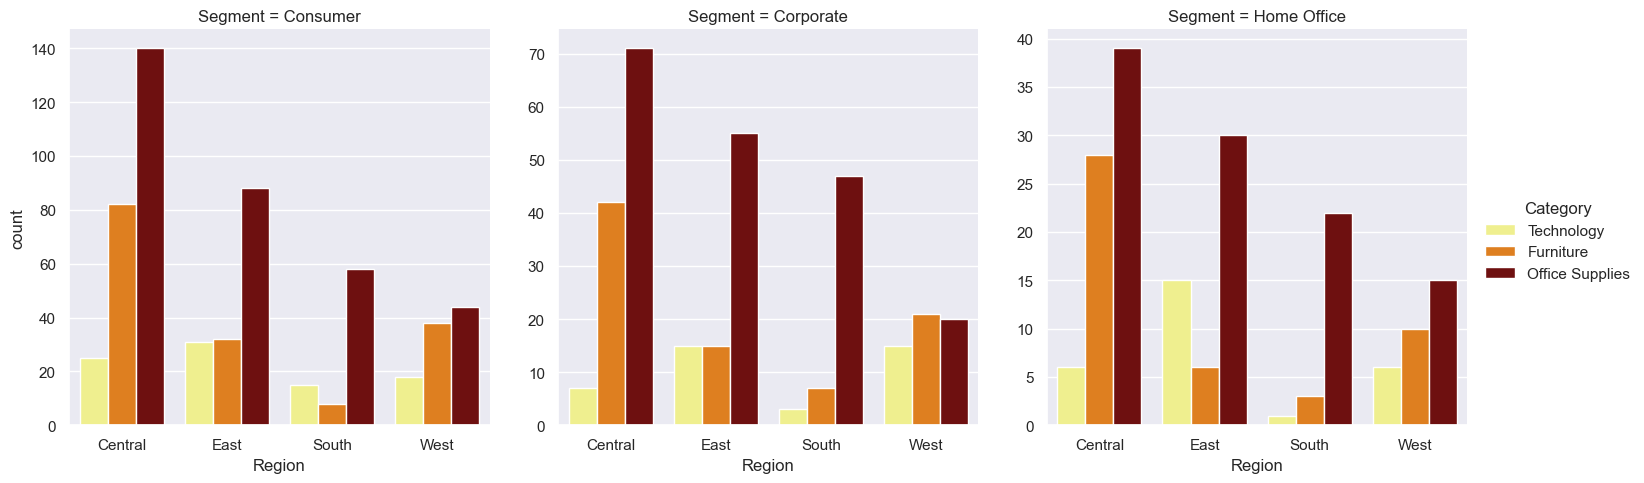

In [43]:
sns.catplot(x='Region', hue='Category',  col='Segment', data=df_neg_profit, kind="count", 
                estimator=lambda : len(x) / len(df_neg_profit) * 100, sharey=False, palette="afmhot_r")
#plt.savefig('images/profit_neg.png')
plt.show();
#  Most negative profit came from in the central region. Need to break down this region ...

In [44]:
# break down the Central region
df_Central = df_neg_profit[df_neg_profit['Region'] == 'Central'].groupby('State').Category.value_counts(normalize=True).unstack()
df_Central.head()
# neg profit mainly came from 'Texas' and 'Illinois'

Category  Furniture  Office Supplies  Technology
State                                           
Illinois   0.383562         0.541096    0.075342
Texas      0.326531         0.581633    0.091837

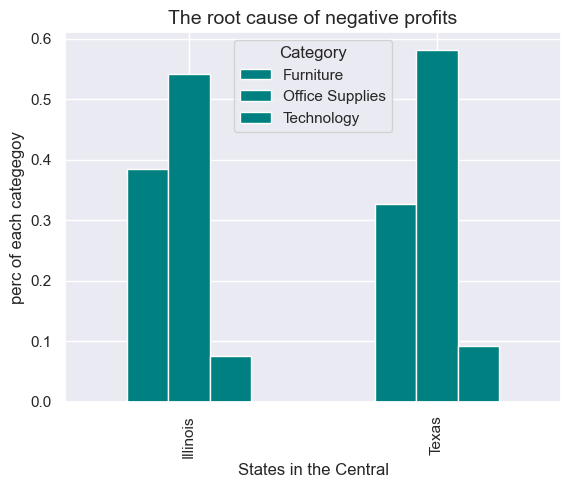

In [45]:
plt.figsize=(6,6)
df_Central.plot(kind='bar', color='teal')
plt.xlabel('States in the Central')
plt.ylabel('perc of each categegoy')
plt.title('The root cause of negative profits', fontsize=14)
plt.savefig('images/profit_2states.png')
plt.show();

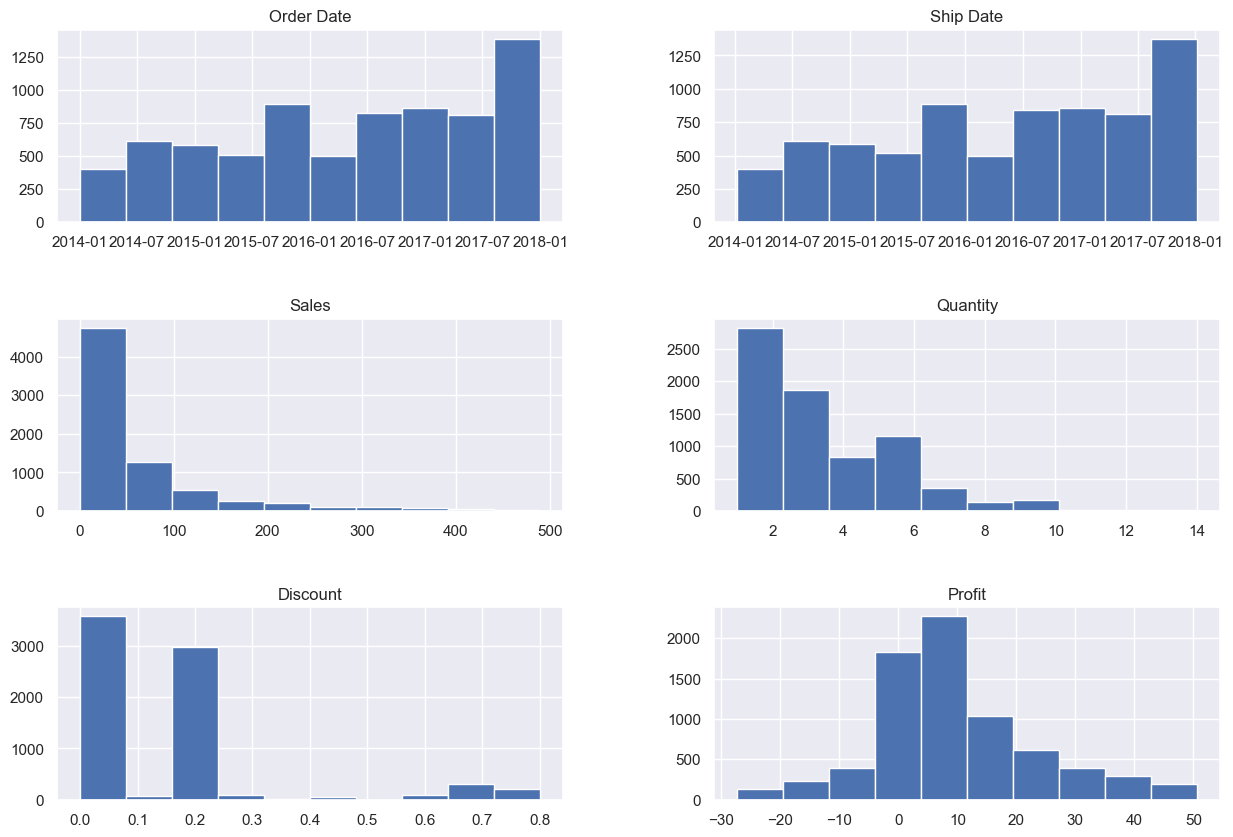

In [46]:
# plot histograms of each of the numeric features
df_cut.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.show();

 - the number of orders increased from 2014 to 2017.
 - 'Sales' has a right tailed distribution with a range from 0.44 to 496.86.

#### Sales & Profit per state

In [47]:
# average sales per state
State_sales_mean = df_cut.groupby('State')['Sales', 'Profit'].mean()
State_sales_mean.sort_values('Sales', ascending=False, inplace=True)
State_sales_mean.head()

Sales     Profit
State                                
Idaho           116.145647  14.620565
South Carolina   84.678750  16.437694
Oregon           76.357070   7.575691
California       73.880159  12.929134
Wisconsin        73.609718  16.545917

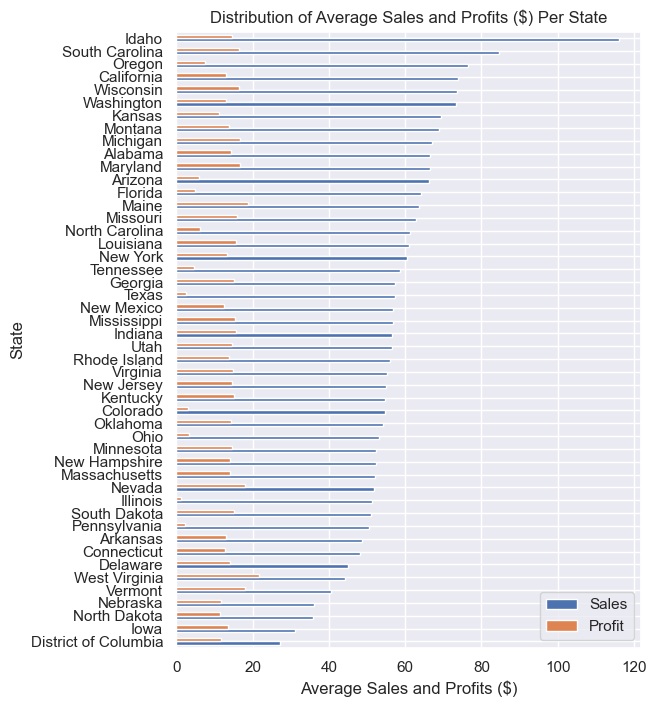

In [48]:
# plot barplot
State_sales_mean.reindex(index=State_sales_mean.Sales.sort_values(ascending=True).index).plot(kind='barh', figsize=(6,8))
plt.xlabel('Average Sales and Profits ($)')
plt.title('Distribution of Average Sales and Profits ($) Per State')
plt.savefig('images/barh_sales.png')
plt.show();

In [49]:
# distribution of sales per state
sales_bystate = pd.melt(df_cut[['State', 'Sales', 'Profit','Quantity', 'Discount']], 
                        id_vars= 'State', 
                        var_name= 'Sales_profit',
                        value_vars =['Sales', 'Profit'], 
                        value_name= 'Amount')

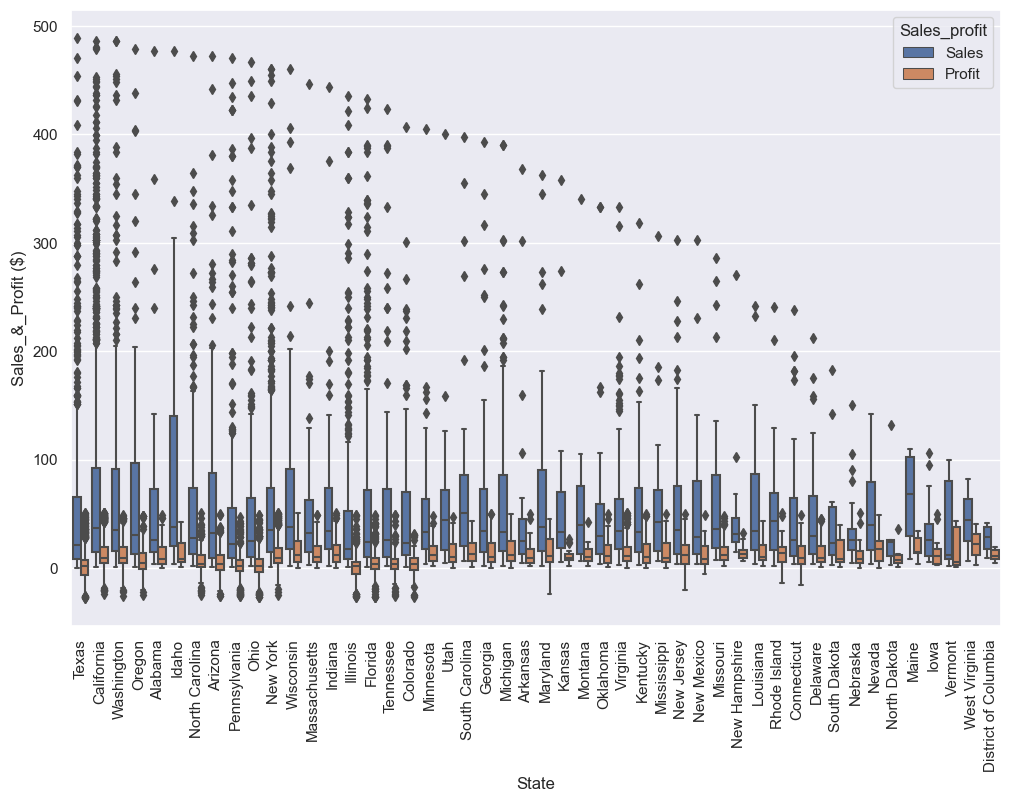

In [50]:
# plot boxplot
plt.subplots(figsize=(12, 8))
sns.boxplot(x='State', y='Amount',hue='Sales_profit', data=sales_bystate)
plt.xticks(rotation='vertical')
plt.ylabel('Sales_&_Profit ($)')
plt.xlabel('State')
plt.savefig('images/hist_sales.png')
plt.show();

- Idaho had the largest average sales but no larger profits.
      
- Question of interest:
     - What products had the customers in Idaho ordered?

### 4.2 Add population data

In [51]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [52]:
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [53]:
usa_states = usa_states[0]
usa_states.head()

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[A] Population[B][3] Total area[4]          Land area[4]  \
  Established[A] Population[B][3]           mi2      km2          mi2   
0   Dec 14, 1819          4903185         52420   135767        50645   
1    Jan 3, 1959           731545        665384  1723337       570641   
2   Feb 14, 1912          7278717        113990   295234       113594   
3   Jun 15, 1836          3017804         53179   137732        52035   
4    Sep 9, 1850         39512223        163695   423967       155779   

           Water area[4]         Numberof Reps.  
       km2           mi2     km2 Numberof Reps.  
0   131171          1775    4597              7  
1  1477953         94743  245384              1  
2   294207           396    1026              9  
3   134771          1143    2961              4  
4   403466          7916   20501             53

In [54]:
usa_states_sub = usa_states.iloc[:, [0,5]].copy()
usa_states_sub.columns = ['State', 'state_population']
usa_states_sub.head()

State  state_population
0     Alabama           4903185
1      Alaska            731545
2     Arizona           7278717
3    Arkansas           3017804
4  California          39512223

In [55]:
usa_states_sub.State[usa_states_sub.State.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia|Washington|Kentucky')]

16         Kentucky[C]
20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
46          Washington
47       West Virginia
Name: State, dtype: object

In [56]:
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' empty string; regex=True;  used a regex
usa_states_sub.State.replace(to_replace=r'\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.State[usa_states_sub.State.str.contains('Kentucky|Massachusetts|Pennsylvania|Rhode Island|Virginia')]

16         Kentucky
20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: State, dtype: object

In [57]:
state_sales_summary = df_cut.groupby('State').agg(total_sales_state = pd.NamedAgg(column='Sales', aggfunc='sum')).reset_index()
state_sales_summary.head()

State  total_sales_state
0     Alabama          2797.6800
1     Arizona         11114.2780
2    Arkansas          1850.5000
3  California        113923.2055
4    Colorado          7212.3490

In [58]:
state_sales_summary['State'].replace(to_replace ='District of Columbia', value='Maryland', inplace=True)

In [59]:
# Find the states in `state_summary` that are not in `usa_states_sub`
#Hint: set(list1) - set(list2) is an easy way to get items in list1 that are not in list2
missing_states = set(state_sales_summary.State) - set(usa_states_sub.State)
missing_states

set()

In [60]:
# verify no state missing in the summary
missing_states = set(state_sales_summary.State) - set(usa_states_sub.State)
missing_states

set()

#### Create a new data frame of summary statistics for various states by adding information of population per state.

In [61]:
#`merge()` to combine our new data 
state_summary = state_sales_summary.merge(usa_states_sub, how='left', on='State').sort_values('state_population', ascending=False)

In [62]:
state_summary['sales_per_10kcapita'] = round(100_00 * state_summary.total_sales_state / state_summary.state_population)
state_summary.head()
# California is the most densely populated state with the largest sales

State  total_sales_state  state_population  sales_per_10kcapita
3     California        113923.2055          39512223                 29.0
41         Texas         42113.6214          28995881                 15.0
8        Florida         19725.7590          21477737                  9.0
30      New York         50030.4240          19453561                 26.0
36  Pennsylvania         21879.1980          12801989                 17.0

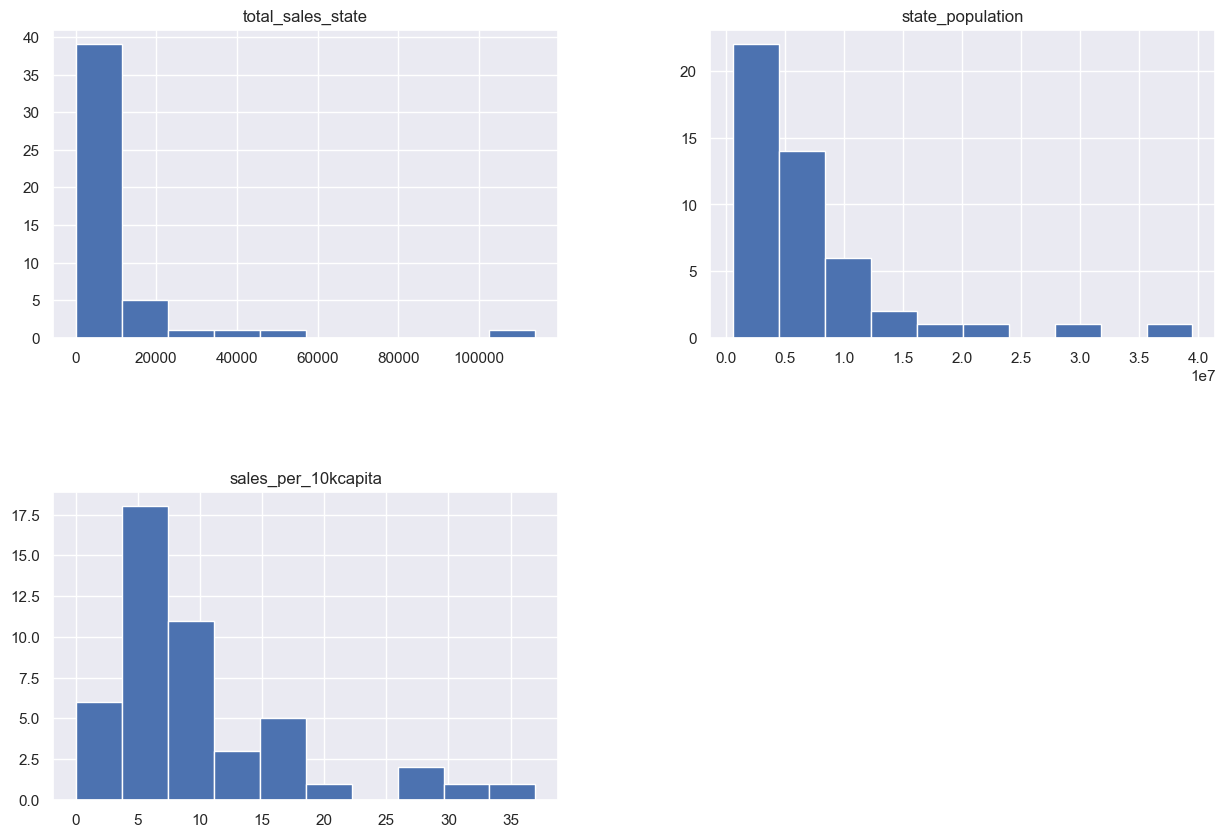

In [63]:
state_summary.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.show();

In [64]:
df_combined = df_cut.merge(state_summary, how='left', on='State')
df_combined = df_combined.drop(['total_sales_state', 'state_population'], axis=1)
#df_combined.reset_index()
df_combined.head(3)

Order Date  Ship Date        ShipMode   Segment         City       State  \
0 2014-08-05 2014-08-12  Standard Class  Consumer   Texas City       Texas   
1 2017-11-03 2017-11-09  Standard Class  Consumer  Bakersfield  California   
2 2014-09-08 2014-09-14  Standard Class  Consumer        Pasco  Washington   

    Region         Category Sub-Category  \
0  Central        Furniture       Tables   
1     West        Furniture       Tables   
2     West  Office Supplies      Storage   

                                        Product Name    Sales  Quantity  \
0  SAFCO PlanMaster Heigh-Adjustable Drafting Tab...  489.230         2   
1  SAFCO PlanMaster Boards, 60w x 37-1/2d, White ...  486.368         4   
2  Carina Double Wide Media Storage Towers in Nat...  485.880         6   

   Discount   Profit  sales_per_10kcapita  
0       0.3  41.9340                 15.0  
1       0.2  36.4776                 29.0  
2       0.0  19.4352                 37.0

In [65]:
df_combined.shape

(7456, 15)

### 4.3 Categorical features summary

In [66]:
# Categorical to Quantitative relationship
categorical_features = [i for i in df_combined.columns if df_combined.dtypes[i] == "object"]
categorical_features

['ShipMode',
 'Segment',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category',
 'Product Name']

In [67]:
df_cat = df_combined[['ShipMode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Product Name']]

##### bar plots

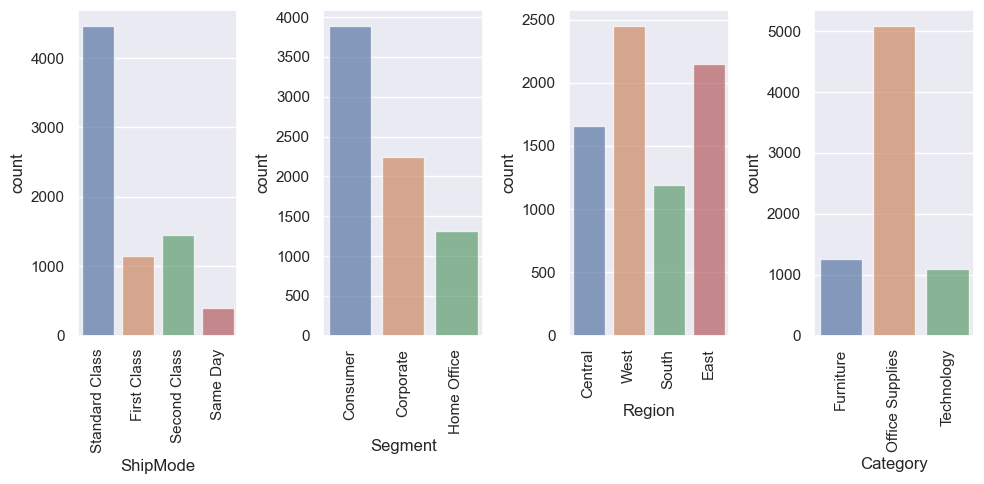

In [68]:
# Countplot for each of the categorical features
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# plot barplot of each feature
for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)
        
fig.tight_layout()     
plt.show();

**Highlights:*
 
 - Ship mode: standard class is the most often used shipping method
 - Segment: the total orders from consumers is dominant
 - Region: West and East regions have higher amount of sales orders than Central and South
 - Category: Office supplies have the highest demand

##### box plots

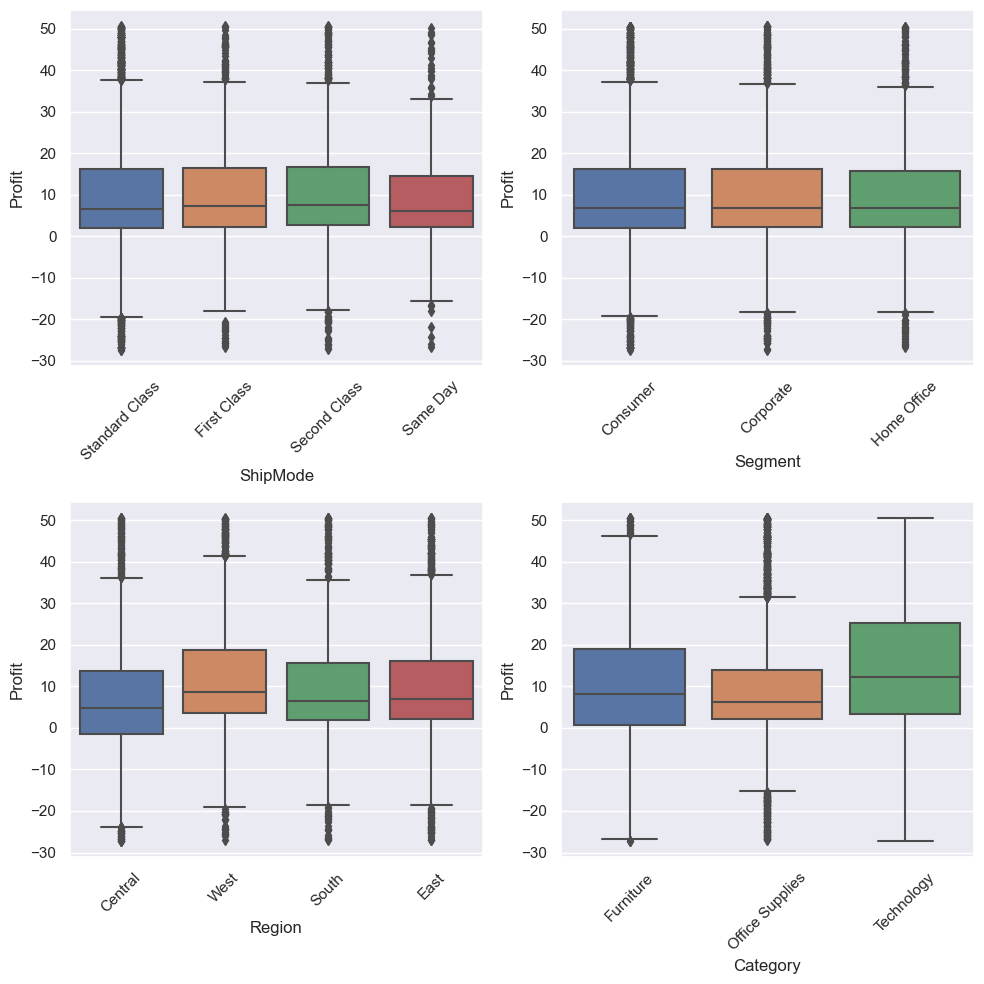

In [69]:
# With the boxplot we can see the variation of the target 'SalePrice' in each of the categorical features
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# plot the variation of Sales in each feature
for i, ax in enumerate(fig.axes):

    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(x=df_cat.columns[i], y="Profit", data=df_combined, ax=ax)

fig.tight_layout()
plt.show();

**Visualize the impact of each feature on 'Profit':**

 - Ship mode and 'Segment': less variant
 - Region: West region has highest amount of profits than others
 - Category: products of 'Technology' have generated largest amount of profit. 

### 4.4 Bivariate analysis

The analysis between a dependent variable and an independent variable to uncover the relationship between them.
#### Feature correlation heatmap

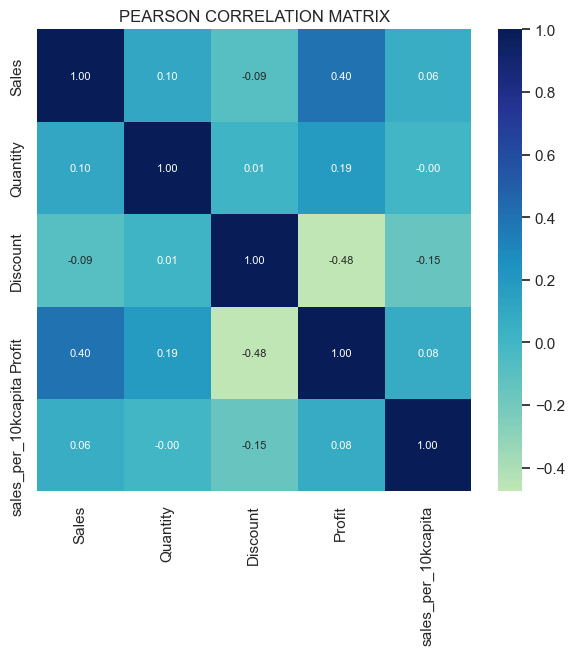

In [70]:
# find relations between two variables
plt.subplots(figsize=(7,6))
sns.heatmap(df_combined.corr(), center=0, cmap="YlGnBu", annot=True, fmt='.2f', annot_kws={"size": 8})
plt.title('PEARSON CORRELATION MATRIX', fontsize=12)
plt.savefig('images/heatmap.png')
plt.show();

**Questions of interests:**
From correlation table, we get a sense of the most important features to the profits. We can see 'the number of discounts' becomes the MOST important contributor to profit.
 
 - 'Discount' is negatively associated with the 'Profit'.
 - 'Sale','Quantity' and 'sales_per_10kcapita' are positively correlated with 'Profit'.

#### Scatter plots of numeric features against profit
Like heatmap, a pair plot and scatter plot are also used to observe linear relations between two variables in a dataset.

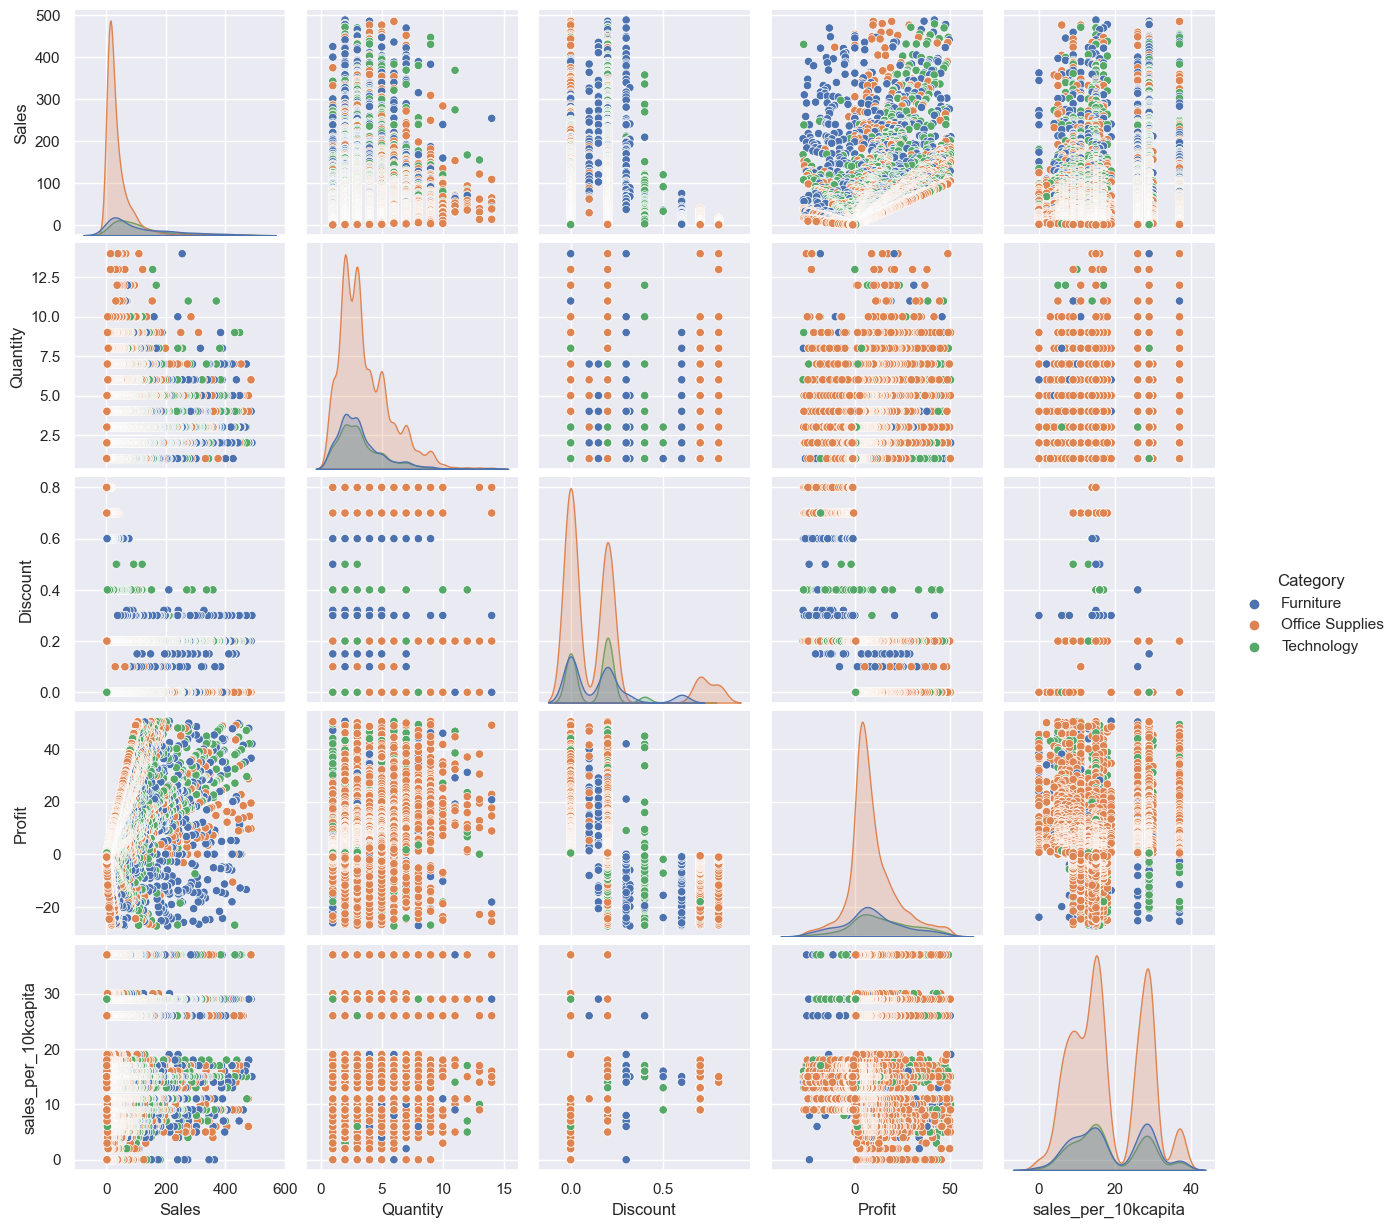

In [71]:
sns.pairplot(df_combined, hue='Category')
plt.show();
# we can see correlations between sales/profit, profit/discount, total sales/total population

In [72]:
# define function to create scatterplots of profit against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Profit', data=df_combined,alpha=0.5)
        ax.set(xlabel=col, ylabel='Profit')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

Categorical variables in the dataset: ['ShipMode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name']


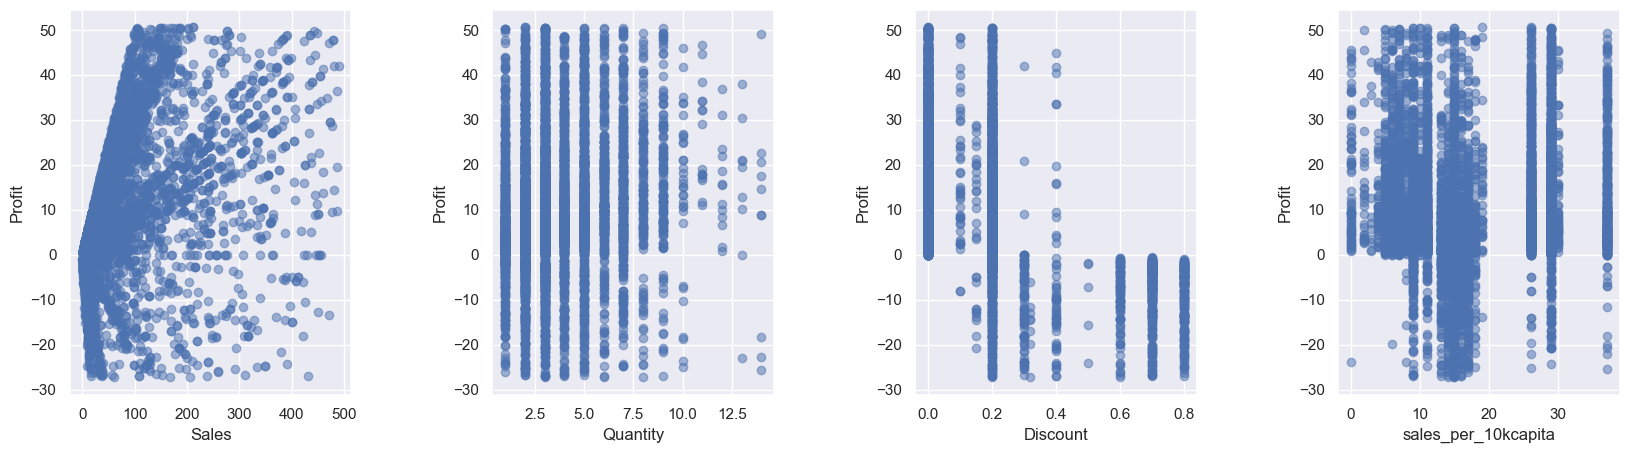

In [73]:
s = (df_combined.dtypes == 'object')
features = list(s[s].index)
print("Categorical variables in the dataset:", features)

ff = [feature for feature in df_combined.columns if feature in ['Sales', 'Quantity', 'Discount', 'sales_per_10kcapita']]

# in this case, the ‘total_sale_state’ attribute is the dependent variable, and every other are the independent variables.
scatterplots(ff, ncol=4, figsize=(20, 5))
plt.show();
# obervation
### the larger profit seems to be associated with quantity (1~10) of items
### the larger profit is centered at 10~20 per 10,000 capita

In [74]:
print("The clean dataset has {} rows and {} columns.".format(df_combined.shape[0], df_combined.shape[1]))

The clean dataset has 7456 rows and 15 columns.


In [77]:
# save the state_summary separately.
datapath = './data'
save_file(df_combined, 'clean_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./data\clean_data.csv"


## 5. Conclusions

In this notebook, the thorough EDA includes:

 - Break down the sales data, identify the high profitable states, cities and visualize the relations between variables.
 - Think about what factors drive the growth of the profit?    